In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter
import numpy as np

from qiskit_nature.second_q.drivers import PySCFDriver

from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit.algorithms.optimizers import SLSQP
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import GroundStateEigensolver


In [12]:
def custom_ansatz_2(circuit, operator, num_orbitals, p, q, initial_state, param_num):

    excitations = p+q

    # rotation angle
    angle = Parameter(f'θ_{param_num}')

    # creating the circuit
    # circuit = QuantumCircuit(num_orbitals)

    # specifying the initial state (reference state)
    # if initial_state != False:
    #     circuit.initialize(initial_state, range(num_orbitals))

    # klji
    for ladder in operator:

        # changing bases
        for q, op in zip(excitations, ladder[1:]):
            if op == "X":
                circuit.h(q)
            elif op == "Y":
                circuit.rx(np.pi/2, q)
        
        # cnot ladder
        for o in range(num_orbitals-1):
            circuit.cx(o, o+1)

        # rotation
        sign = -1 if ladder[0] == "-" else 1
        circuit.rz( sign * angle/len(operator), num_orbitals-1)

        # cnot ladder
        for o in range(num_orbitals-2, -1, -1):
            circuit.cx(o, o+1)

        # changing back bases
        for q, op in zip(excitations, ladder[1:]):
            if op == "X":
                circuit.h(q)
            elif op == "Y":
                circuit.rx(-np.pi/2, q)

    return circuit

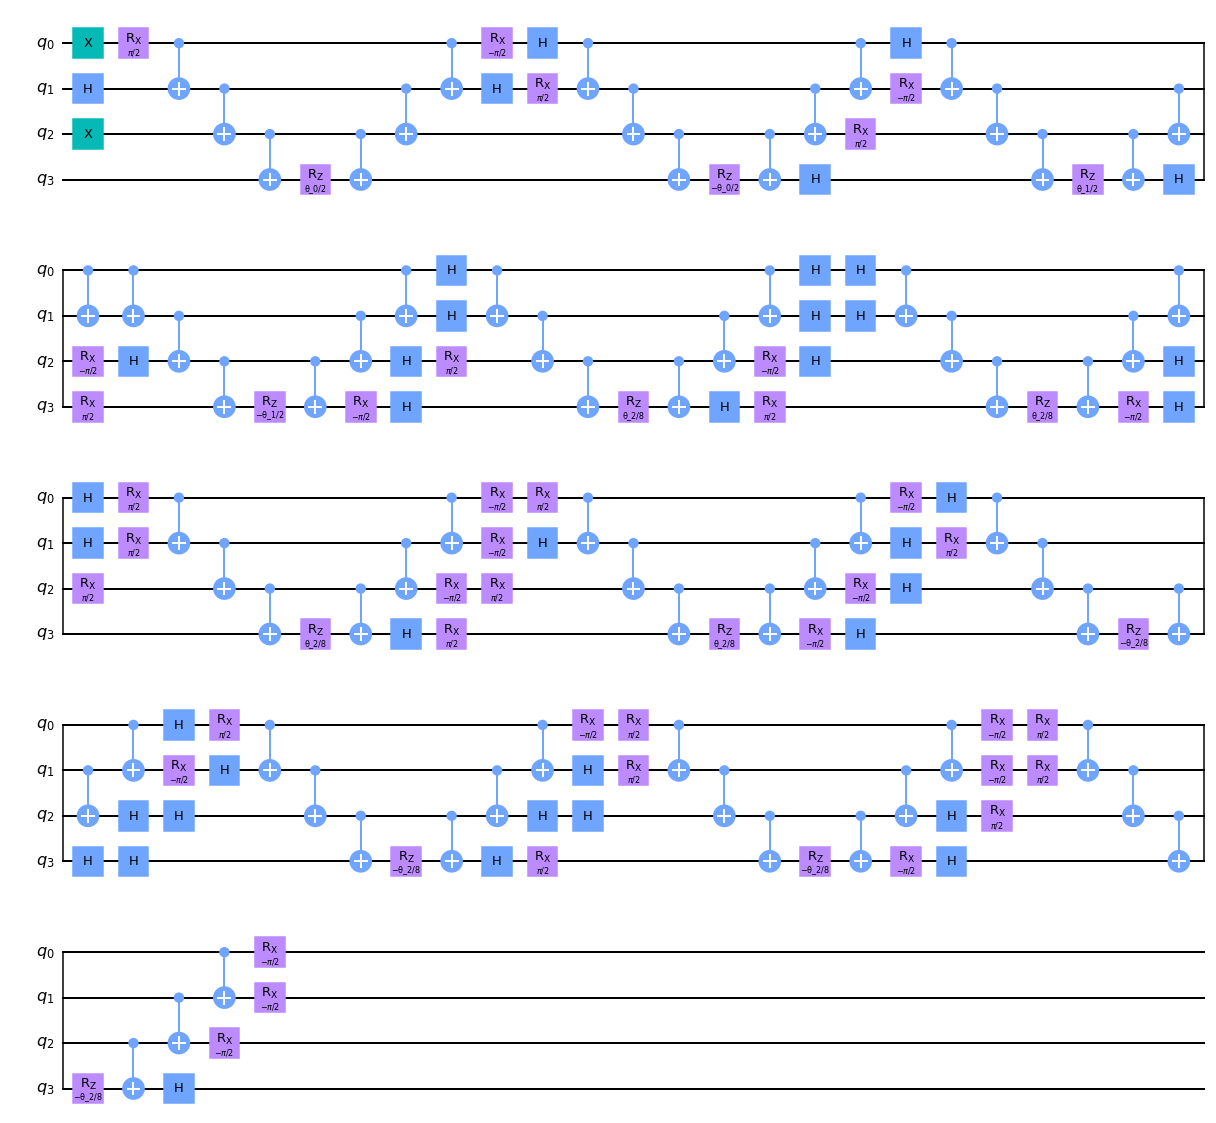

In [13]:
circuit = QuantumCircuit(4)
circuit.x(0)
circuit.x(2)

circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [0], [1], False, 0)
circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [2], [3], False, 1)

ansatz = custom_ansatz_2(circuit,
["+XXYX", "+XXXY", "+YYYX", "+YXYY", "-XYXX", "-YXXX", "-YYXY", "-YYYX"],
4, [0,1], [2,3], False, 2)

ansatz.draw(output="mpl")

In [14]:
def calc_d(r):
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", basis="sto-3g")
    mol = driver.run()

    circuit = QuantumCircuit(4)
    circuit.x(0)
    circuit.x(2)

    # circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [0], [1], False, 0)
    # circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [2], [3], False, 1)

    circuit = custom_ansatz_2(circuit,
    ["+XXYX", "+XXXY", "+YYYX", "+YXYY", "-XYXX", "-YXXX", "-YYXY", "-YYYX"],
    4, [0,1], [2,3], False, 2)

    ansatz = circuit

    vqe = VQE(Estimator(), ansatz, SLSQP())

    vqe.initial_point = np.zeros(ansatz.num_parameters)

    mapper = JordanWignerMapper()
    
    solver = GroundStateEigensolver(mapper, vqe)
    result = solver.solve(mol)

    return result.total_energies[0]

In [15]:
def calc_sd(r):
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", basis="sto-3g")
    mol = driver.run()

    circuit = QuantumCircuit(4)
    circuit.x(0)
    circuit.x(2)

    circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [0], [1], False, 0)
    circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [2], [3], False, 1)

    circuit = custom_ansatz_2(circuit,
    ["+XXYX", "+XXXY", "+YYYX", "+YXYY", "-XYXX", "-YXXX", "-YYXY", "-YYYX"],
    4, [0,1], [2,3], False, 2)

    ansatz = circuit

    vqe = VQE(Estimator(), ansatz, SLSQP())

    vqe.initial_point = np.zeros(ansatz.num_parameters)

    mapper = JordanWignerMapper()
    
    solver = GroundStateEigensolver(mapper, vqe)
    result = solver.solve(mol)

    return result.total_energies[0]

In [16]:
def calc_s(r):
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", basis="sto-3g")
    mol = driver.run()

    circuit = QuantumCircuit(4)
    circuit.x(0)
    circuit.x(2)

    circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [0], [1], False, 0)
    circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [2], [3], False, 1)

    # circuit = custom_ansatz_2(circuit,
    # ["+XXYX", "+XXXY", "+YYYX", "+YXYY", "-XYXX", "-YXXX", "-YYXY", "-YYYX"],
    # 4, [0,1], [2,3], False, 2)

    ansatz = circuit

    vqe = VQE(Estimator(), ansatz, SLSQP())

    vqe.initial_point = np.zeros(ansatz.num_parameters)

    mapper = JordanWignerMapper()
    
    solver = GroundStateEigensolver(mapper, vqe)
    result = solver.solve(mol)

    return result.total_energies[0]

In [17]:
def calc_test(r):
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", basis="sto-3g")
    mol = driver.run()

    circuit = QuantumCircuit(4)
    circuit.x(0)
    circuit.x(2)

    # circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [0], [1], False, 0)
    # circuit = custom_ansatz_2(circuit, ["+YX", "-XY"], 4, [2], [3], False, 1)

    circuit = custom_ansatz_2(circuit,
    ["+XXYX"],
    4, [0,1], [2,3], False, 2)

    ansatz = circuit

    vqe = VQE(Estimator(), ansatz, SLSQP())

    vqe.initial_point = np.zeros(ansatz.num_parameters)

    mapper = JordanWignerMapper()
    
    solver = GroundStateEigensolver(mapper, vqe)
    result = solver.solve(mol)

    return result.total_energies[0]

In [18]:
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock

def calc_q(r):
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", basis="sto-3g")
    mol = driver.run()

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    mol.num_spatial_orbitals,
    mol.num_particles,
    mapper,
    initial_state=HartreeFock(
        mol.num_spatial_orbitals,
        mol.num_particles,
        mapper))

    vqe = VQE(Estimator(), ansatz, SLSQP())

    vqe.initial_point = np.zeros(ansatz.num_parameters)
    
    solver = GroundStateEigensolver(mapper, vqe)
    result = solver.solve(mol)

    return result.total_energies[0]

In [19]:
lin = np.linspace(0.4,10,10)

In [20]:
e_cUCCD = [calc_d(r) for r in lin]

In [21]:
e_cUCCSD = [calc_sd(r) for r in lin]

In [22]:
e_cUCCS = [calc_s(r) for r in lin]

In [23]:
e_test = [calc_test(r) for r in lin]

In [24]:
e_qiskit = [calc_q(r) for r in lin]

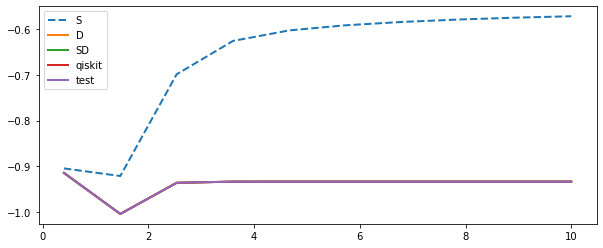

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(lin, e_cUCCS, lw=2, ls="--", label="S")
plt.plot(lin, e_cUCCD, lw=2, label="D")
plt.plot(lin, e_cUCCSD, lw=2, label="SD")
plt.plot(lin, e_qiskit, lw=2, label="qiskit")
plt.plot(lin, e_test, lw=2, ls="-", label="test")


plt.legend()

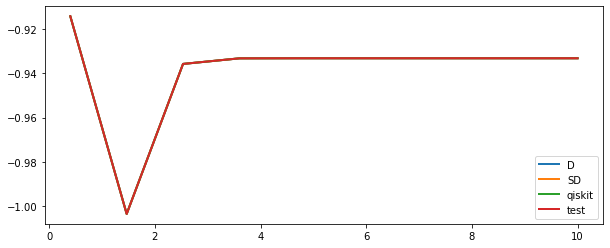

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# plt.plot(lin, e_cUCCS, lw=2, label="S")
plt.plot(lin, e_cUCCD, lw=2, label="D")
plt.plot(lin, e_cUCCSD, lw=2, label="SD")
plt.plot(lin, e_qiskit, lw=2, label="qiskit")
plt.plot(lin, e_test, lw=2, label="test")


plt.legend()